In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold 
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from xgboost import XGBRegressor
colors=['#97C1A9','#FFFFFF']
import warnings

# Filter warning messages
warnings.filterwarnings("ignore")  # Ignore all warnings

In [27]:
df=pd.read_csv(r"D:\PROJECTS\20230626_Crop Yield Prediction\crop_yield.csv")
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [28]:
df.shape

(777, 18)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row#,777.0,388.000000,224.444871,0.000000,194.000000,388.000000,582.000000,776.000000
clonesize,777.0,18.767696,6.999063,10.000000,12.500000,12.500000,25.000000,40.000000
honeybee,777.0,0.417133,0.978904,0.000000,0.250000,0.250000,0.500000,18.430000
bumbles,777.0,0.282389,0.066343,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,777.0,0.468817,0.161052,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,777.0,0.562062,0.169119,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,777.0,82.277091,9.193745,69.700000,77.400000,86.000000,89.000000,94.600000
MinOfUpperTRange,777.0,49.700515,5.595769,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,777.0,68.723037,7.676984,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,777.0,59.309395,6.647760,50.200000,55.800000,62.000000,66.000000,68.200000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

## EDA

Correlation

Text(0.5, 1.0, 'Yield Correlation')

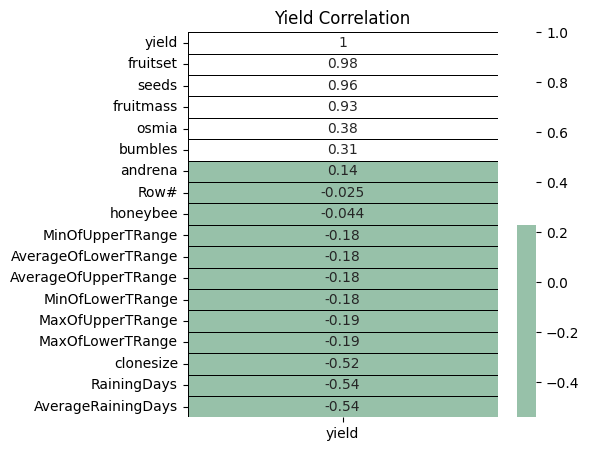

In [34]:
corr=df.corrwith(df['yield']).sort_values(ascending=False).to_frame()
corr.columns = ['yield']

plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap=colors,linewidths=0.4,linecolor='black')

plt.title("Yield Correlation")

Distribution of Target Variable

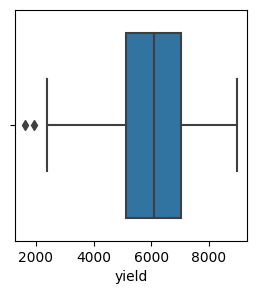

In [38]:
plt.figure(figsize=(3,3))
sns.boxplot(x='yield', data=df)
plt.show()

In [41]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

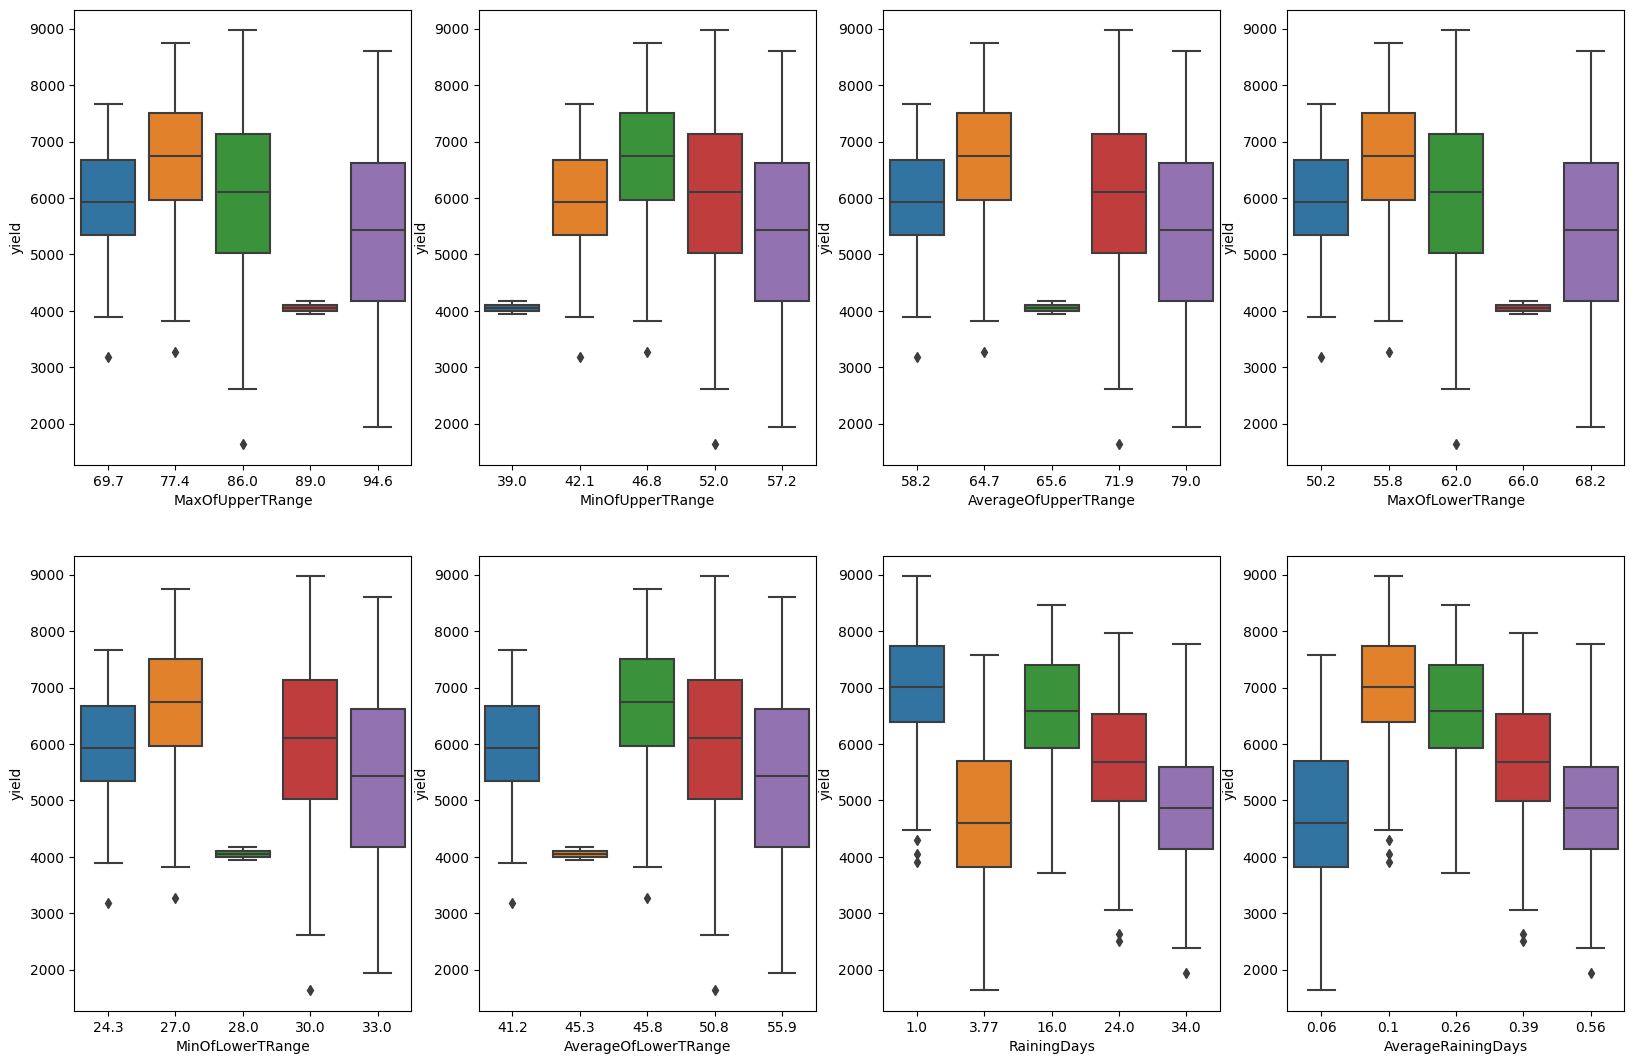

In [44]:
nominal_df=df[['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays']]

fig, ax=plt.subplots(2,4, figsize=(20,13))
for e, col in enumerate(nominal_df.columns):
    if e<=3:
        sns.boxplot(data=df, x=col,y='yield', ax=ax[0,e])
    else:
        sns.boxplot(data=df, x=col, y='yield', ax=ax[1, e-4])
plt.show()

Distribution of Types of Bees

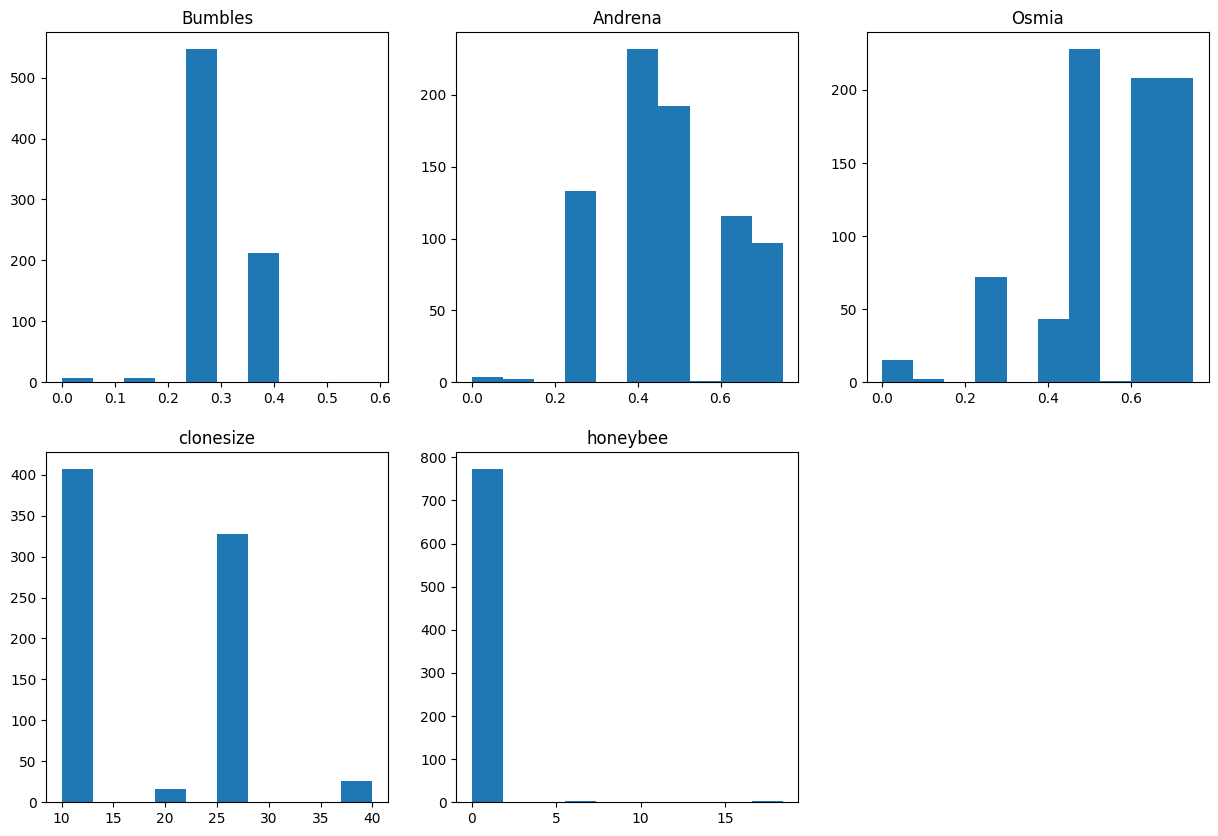

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df['bumbles'])
plt.title("Bumbles")

plt.subplot(2,3,2)
plt.hist(df['andrena'])
plt.title("Andrena")

plt.subplot(2,3,3)
plt.hist(df['osmia'])
plt.title("Osmia")

plt.subplot(2,3,4)
plt.hist(df['clonesize'])
plt.title("clonesize")

plt.subplot(2,3,5)
plt.hist(df['honeybee'])
plt.title("honeybee")

plt.show()


## Data Preprocessing

Mutual Info Regression

In [56]:
features_df = df.drop(columns=['yield', 'Row#'])
target = df['yield']

In [57]:
#run the MI scores of the dataset
mi_score=mutual_info_regression(features_df, target, n_neighbors=3, random_state=42)
mi_score_df=pd.DataFrame({'columns':features_df.columns, 'MI_score':mi_score})
mi_score_df.sort_values(by='MI_score', ascending=False)

,columns,MI_score
13,fruitset,1.948853
15,seeds,1.664007
14,fruitmass,1.588506
12,AverageRainingDays,0.217232
11,RainingDays,0.215965
0,clonesize,0.182163
5,MaxOfUpperTRange,0.125941
6,MinOfUpperTRange,0.125599
8,MaxOfLowerTRange,0.124477
10,AverageOfLowerTRange,0.123369


Clustering Using K-Means

In [62]:
X_cluster=features_df[['honeybee','osmia','bumbles','andrena']]

# standardize the dataset using std scaler
scaler=StandardScaler()
scaler.fit(X_cluster)
X_new_cluster=scaler.transform(X_cluster)

#K means clustering
clustering=KMeans(n_clusters=3, random_state=42)
clustering.fit(X_new_cluster)
n_cluster=clustering.labels_

#add new feature to feature_df
features_df['n_cluster']=n_cluster
df['n_cluster']=n_cluster
features_df['n_cluster'].value_counts()


n_cluster
1    368
0    213
2    196
Name: count, dtype: int64

Data Normalization Using Min Max Scaler

In [63]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'n_cluster'],
      dtype='object')

In [64]:
feature_set=['AverageRainingDays','clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia','AverageOfUpperTRange','AverageOfLowerTRange','n_cluster']

#final dataframe
X=features_df[feature_set]
y=target.round(1)

#train and test dataset to build baseline model using GBT and RFs by scaling the dataset
mx_scaler=MinMaxScaler()
X_scaled=pd.DataFrame(mx_scaler.fit_transform(X))
X_scaled.columns=X.columns

## Model and Evaluation

In [65]:
models={'abr': AdaBoostRegressor(),
'gbr': GradientBoostingRegressor(),
'rfr': RandomForestRegressor()
}

#cross value scores of the models
for key, val in models.items():
    print(f"cross validation for {key}")
    score=cross_val_score(val, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_score=-np.sum(score)/5
    sqrt_score=np.sqrt(mean_score)
    print(sqrt_score)

cross validation for abr
722.287206008548
cross validation for gbr
532.1209988412758
cross validation for rfr
604.9377573471554


Train Test Split & Modeling

In [66]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# gradient boosting regressor modeling
bgt = GradientBoostingRegressor(random_state=42)
bgt.fit(X_train,y_train)
preds = bgt.predict(X_test)
score = bgt.score(X_train,y_train)
rmse_score = np.sqrt(mean_squared_error(y_test, preds))
r2_score = r2_score(y_test, preds)
print("RMSE score gradient boosting machine:", rmse_score)      
print("R2 score for the model: ", r2_score)

RMSE score gradient boosting machine: 364.00243597031556
R2 score for the model:  0.9318296381225896


Hyperparameter Tuning

In [74]:
# K-fold split the dataset
kf = KFold(n_splits = 5, shuffle=True, random_state=0)

# params grid for tuning the hyperparameters
param_grid = {'n_estimators': [100,200,400,500,800],
             'learning_rate': [0.1,0.05,0.3,0.7],
             'min_samples_split': [2,4],
             'min_samples_leaf': [0.1,0.4],
             'max_depth': [3,4,7]
             }

# GBR estimator object 
estimator = GradientBoostingRegressor(random_state=42)

# Grid search CV object 
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kf, 
                   scoring='neg_mean_squared_error', n_jobs=-1)
clf.fit(X_scaled,y)

# print the best the estimator and params
best_estim = clf.best_estimator_
best_score = clf.best_score_
best_param = clf.best_params_
print("Best Estimator:", best_estim)
print("Best score:", np.sqrt(-best_score))

Best Estimator: GradientBoostingRegressor(max_depth=4, min_samples_leaf=0.1, n_estimators=800,
                          random_state=42)
Best score: 305.9231276177136
